# Exercise 3. Text Representation Part 1

So, instead your homework is simply to apply our two new models (**multinomial naive Bayes and a neural network**) to the **20-Newsgroups dataset**. Please try to include advanced preprocessing such as stemming/lemmatization, etc..

The easiest would be for you to use the stored pkl data from the last exercise.

I trust you to come up with a sensible data validation split to measure the performance.

In [24]:
# Import packages
import pickle
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import Binarizer
import pandas as pd
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
import math
from google.colab import drive
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# **Datasets**

**Stem**

In [5]:
drive.mount("/content/drive")
DATA_PATH = "/content/drive/Othercomputers/Mi portátil/Master/GitHub/twsm-PERSONAL"
infile = open(DATA_PATH+'/Data/Stemmed.pkl','rb')
data_stem = pickle.load(infile)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
len(data_stem)

11314

In [15]:
stem_df = pd.DataFrame(data_stem, columns=["stem"])

**Y**

In [12]:
y= pd.read_json("https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json")[["target","target_names"]]
y.head()

,target,target_names
0,7,rec.autos
1,4,comp.sys.mac.hardware
2,4,comp.sys.mac.hardware
3,1,comp.graphics
4,14,sci.space


**Whole DF**

In [17]:
df = pd.concat([stem_df,y], axis=1)
df.head()

,stem,target,target_names
0,car wonder enlighten car saw dai door sport ca...,7,rec.autos
1,clock poll final final clock report acceler cl...,4,comp.sys.mac.hardware
2,question folk mac plu final gave ghost weekend...,4,comp.sys.mac.hardware
3,weitek robert kyanko rob rjck uucp wrote abrax...,1,comp.graphics
4,shuttl launch question articl cowcb world std ...,14,sci.space


**Train Test Split**

In [47]:
from sklearn.model_selection import train_test_split

X = df["stem"]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# **Multinomial Naive Bayes**



Apply the sklearn tranformations by removing all words that appear in less than min_df of the documents and more than max_df of the documents.

In [64]:
# Set transformers
vec_abs= CountVectorizer(max_df=0.95, min_df=0.02) #Absolute frequency
vec_rel = TfidfVectorizer(max_df=0.95, min_df=0.02, use_idf=False, norm='l1') # Relative frequency
vec_tf= TfidfVectorizer(max_df=0.95, min_df=0.02, smooth_idf=False) #Tf-IDF frequency

In [65]:
#Abs
X_train_abs = vec_abs.fit_transform(X_train).toarray()
X_test_abs = vec_abs.transform(X_test).toarray() #IMPORTANT use .transform, not .fit_transform

In [66]:
clf_abs = MultinomialNB()
clf_abs.fit(X_train_abs, y_train)

MultinomialNB()

In [67]:
#Rel
X_train_rel = vec_rel.fit_transform(X_train).toarray()
X_test_rel = vec_rel.transform(X_test).toarray() #IMPORTANT use .transform, not .fit_transform

In [68]:
clf_rel = MultinomialNB()
clf_rel.fit(X_train_rel, y_train)

MultinomialNB()

In [69]:
#Tf
X_train_tf = vec_tf.fit_transform(X_train).toarray()
X_test_tf = vec_tf.transform(X_test).toarray() #IMPORTANT use .transform, not .fit_transform

In [70]:
clf_tf = MultinomialNB()
clf_tf.fit(X_train_tf, y_train)

MultinomialNB()

**Validation**

In [71]:
# Abs Predict the Test set results, determine accuracy
y_pred_s = clf_abs.predict(X_test_abs)
print('Train accuracy: ', clf_abs.score(X_train_abs, y_train))
print('Test accuracy: ', accuracy_score(y_pred_s, y_test))

Train accuracy:  0.7651738361814968
Test accuracy:  0.7058303886925795


In [72]:
# Rel Predict the Test set results, determine accuracy
y_pred_s = clf_rel.predict(X_test_rel)
print('Train accuracy: ', clf_rel.score(X_train_rel, y_train))
print('Test accuracy: ', accuracy_score(y_pred_s, y_test))

Train accuracy:  0.6831663720290709
Test accuracy:  0.6307420494699647


In [73]:
# Tf Predict the Test set results, determine accuracy
y_pred_s = clf_tf.predict(X_test_tf)
print('Train accuracy: ', clf_tf.score(X_train_tf, y_train))
print('Test accuracy: ', accuracy_score(y_pred_s, y_test))

Train accuracy:  0.7953250834806521
Test accuracy:  0.7243816254416962


# **Neural Networks**

In [75]:
from tensorflow import keras
from tensorflow.keras import layers

In [96]:
# number of classes in dataset
df.target.nunique()

20

In [86]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [104]:
model = keras.Sequential()
model.add(layers.Dense(20, activation="relu", input_dim=X_train_abs.shape[1]))
model.add(layers.Dense(20, activation="sigmoid"))

In [105]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [106]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 20)                16360     
                                                                 
 dense_11 (Dense)            (None, 20)                420       
                                                                 
Total params: 16,780
Trainable params: 16,780
Non-trainable params: 0
_________________________________________________________________


In [108]:
history = model.fit(X_train_abs.astype("float32"),
                    y_train,
                    epochs=20,
                    validation_split=0.3)

Epoch 1/20
223/223 [==============================] - 1s 6ms/step - loss: 0.0333 - accuracy: 0.9070 - val_loss: 0.1038 - val_accuracy: 0.7201
Epoch 2/20
223/223 [==============================] - 2s 7ms/step - loss: 0.0322 - accuracy: 0.9092 - val_loss: 0.1058 - val_accuracy: 0.7182
Epoch 3/20
223/223 [==============================] - 2s 7ms/step - loss: 0.0310 - accuracy: 0.9123 - val_loss: 0.1082 - val_accuracy: 0.7159
Epoch 4/20
223/223 [==============================] - 2s 8ms/step - loss: 0.0301 - accuracy: 0.9183 - val_loss: 0.1104 - val_accuracy: 0.7185
Epoch 5/20
223/223 [==============================] - 1s 6ms/step - loss: 0.0291 - accuracy: 0.9217 - val_loss: 0.1132 - val_accuracy: 0.7211
Epoch 6/20
223/223 [==============================] - 1s 5ms/step - loss: 0.0280 - accuracy: 0.9230 - val_loss: 0.1161 - val_accuracy: 0.7175
Epoch 7/20
223/223 [==============================] - 1s 5ms/step - loss: 0.0274 - accuracy: 0.9259 - val_loss: 0.1185 - val_accuracy: 0.7133
Epoch 

In [109]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [115]:
model.evaluate(np.asarray(X_test_abs).astype("float32"), y_test)

36/36 [==============================] - 0s 2ms/step - loss: 0.1586 - accuracy: 0.7138


[0.1586070954799652, 0.71378093957901]

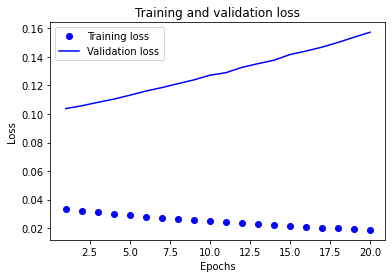

In [116]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

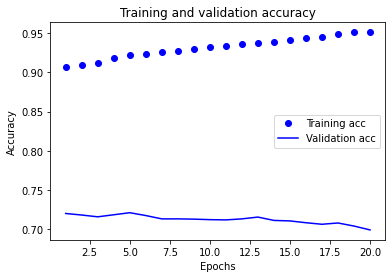

In [117]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()